In [61]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

In [62]:
data_raw = pd.read_excel(u"RawData.xlsx", index_col=0, na_values='NA')
data_raw.head()

,№№ скважин,Пласт,Фация,"Верх интервала отбора, м","Низ интервала отбора, м","Вынос керна,м","Место взятия от верха, м",Лабораторный номер образца,Краткая литологическая характеристика,"Открытая пористость по воде, %",...,"Газопроницаемость перпендикулярно напластованию, мД","Эффективная проницаемость, мД","Водоудерживающая способность, %","Остаточная водонасыщенность, %","Объемная плотность, г/см3","Кажущаяся минералогическая плотность, г/см3","Потеря веса, %","Глубина отбора образца после привязки к ГИС, м","Смещение, м",Примечание
№ п/п,,,,,,,,,,,,,,,,,,,,,
0,1,МО10-0,NaN,2465.0,2472.0,7.0,0.17,46542-08,"Аргиллит алевритистый до тонкоотмученного, с м...",NaN,...,NaN,NaN,NaN,NaN,2.510000,2.698925,NaN,2464.97,0.2,кусок
1,1,МО10-0,NaN,2465.0,2472.0,7.0,2.34,46541-08,"Аргиллит алевритистый до тонкоотмученного, с м...",NaN,...,NaN,NaN,NaN,NaN,2.490000,2.697725,NaN,2467.14,0.2,кусок
2,1,МО10-0,NaN,2465.0,2472.0,7.0,2.58,46540-08,"Аргиллит алевритистый до тонкоотмученного, с м...",NaN,...,NaN,NaN,NaN,NaN,2.480000,2.672414,NaN,2467.38,0.2,кусок
3,1,МО10-0,NaN,2465.0,2472.0,7.0,2.68,46539-08,"Аргиллит алевритистый до тонкоотмученного, с м...",NaN,...,NaN,NaN,NaN,NaN,2.480000,2.689805,NaN,2467.48,0.2,кусок
4,1,МО12.1,мелководье,2465.0,2472.0,7.0,3.30,46538-08,"Песчаник мелкозернистый, карбонатный, неравном...",9.031357,...,NaN,NaN,95.604445,NaN,2.440524,2.682819,NaN,2468.10,0.2,NaN


In [63]:
data_raw.columns

Index(['№№ скважин', 'Пласт', 'Фация', 'Верх интервала отбора, м',
       'Низ интервала отбора, м', 'Вынос керна,м', 'Место взятия от верха, м ',
       'Лабораторный номер образца', 'Краткая  литологическая характеристика',
       'Открытая пористость по воде, %', 'Открытая пористость по керосину,%',
       'Эффективная пористость ,%',
       'Газопроницаемость параллельно напластованию , мД',
       'Газопроницаемость перпендикулярно напластованию, мД',
       'Эффективная проницаемость, мД', 'Водоудерживающая способность, %',
       'Остаточная водонасыщенность, %', 'Объемная плотность, г/см3',
       'Кажущаяся минералогическая плотность, г/см3', 'Потеря веса, %',
       'Глубина отбора образца после привязки к ГИС, м', 'Смещение, м',
       'Примечание'],
      dtype='object')

In [64]:
categorical_columns=['№№ скважин', 'Пласт', 'Фация', 'Лабораторный номер образца',
                            'Краткая  литологическая характеристика','Примечание']

In [65]:
numerical_columns=['Верх интервала отбора, м','Низ интервала отбора, м',
                          'Вынос керна,м', 'Место взятия от верха, м ', 
                          'Открытая пористость по воде, %', 'Открытая пористость по керосину,%',
                          'Эффективная пористость ,%', 'Газопроницаемость параллельно напластованию , мД',
                          'Газопроницаемость перпендикулярно напластованию, мД',
                          'Эффективная проницаемость, мД', 'Водоудерживающая способность, %',
                          'Остаточная водонасыщенность, %', 'Объемная плотность, г/см3',
                          'Кажущаяся минералогическая плотность, г/см3', 'Потеря веса, %',
                          'Глубина отбора образца после привязки к ГИС, м', 'Смещение, м']

In [66]:
main_data = data_raw[['№№ скважин', 'Пласт', 'Фация',
                      'Краткая  литологическая характеристика','Примечание',
                      'Верх интервала отбора, м','Низ интервала отбора, м', 
                      'Открытая пористость по воде, %', 'Открытая пористость по керосину,%',
                      'Газопроницаемость параллельно напластованию , мД',
                      'Водоудерживающая способность, %', 'Остаточная водонасыщенность, %',
                      'Объемная плотность, г/см3']]

In [67]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10310 entries, 0 to 10309
Data columns (total 23 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   №№ скважин                                           10310 non-null  int64  
 1   Пласт                                                10310 non-null  object 
 2   Фация                                                6339 non-null   object 
 3   Верх интервала отбора, м                             10310 non-null  float64
 4   Низ интервала отбора, м                              10310 non-null  float64
 5   Вынос керна,м                                        10310 non-null  float64
 6   Место взятия от верха, м                             10310 non-null  float64
 7   Лабораторный номер образца                           10310 non-null  object 
 8   Краткая  литологическая характеристика               10310 non-nul

In [68]:
work_columns = ['Водоудерживающая способность, %', 'Открытая пористость по воде, %', 
              'Открытая пористость по керосину,%']

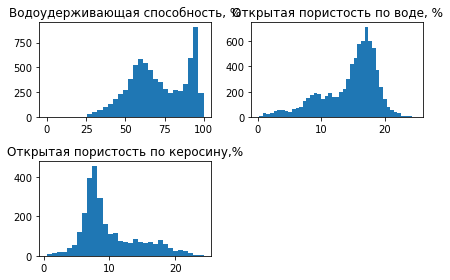

In [69]:
_ = data_raw[work_columns].hist(bins='auto', grid=False)
plt.tight_layout()

In [70]:
work_data =data_raw[work_columns]

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


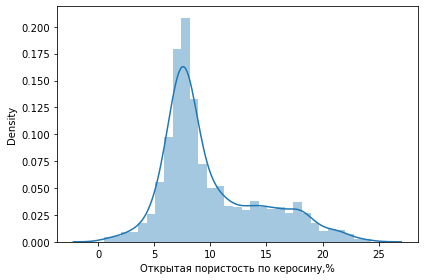

In [71]:
sns.distplot(work_data['Открытая пористость по керосину,%'])
plt.tight_layout()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


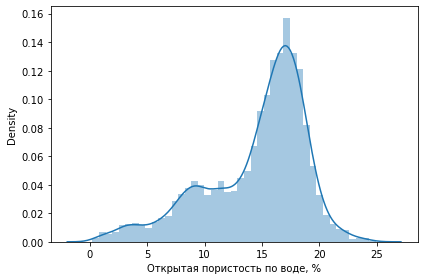

In [72]:
sns.distplot(work_data['Открытая пористость по воде, %'])
plt.tight_layout()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


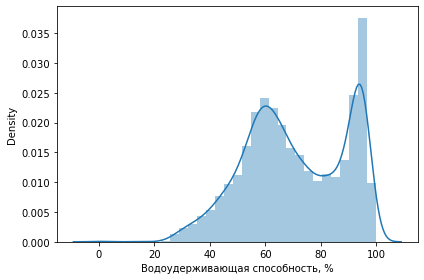

In [73]:
sns.distplot(work_data['Водоудерживающая способность, %'])
plt.tight_layout()

In [74]:
#функция плотности ядра

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


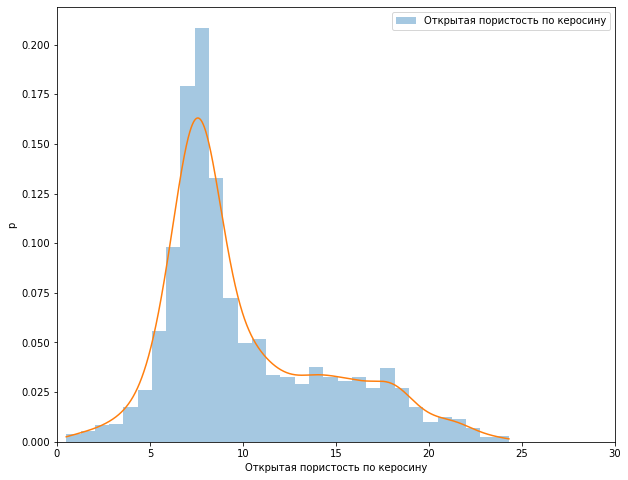

In [75]:
plt.figure(figsize=(10, 8))

df_wd_kpo = work_data['Открытая пористость по керосину,%'].dropna()

kernel = scipy.stats.gaussian_kde(df_wd_kpo)

min_amount = df_wd_kpo.min() 
max_amount = df_wd_kpo.max()
x = np.linspace(min_amount, max_amount, len(df_wd_kpo))
kde_values = kernel(x)

sns.distplot(df_wd_kpo, 
             kde=False, norm_hist=True, label=f'Открытая пористость по керосину')
plt.plot(x, kde_values)

plt.ylabel('p')
plt.xlabel('Открытая пористость по керосину')
# Display values along the abscissa axis only in the interval [0, 10000]
plt.xlim(0, 30)
plt.legend()
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


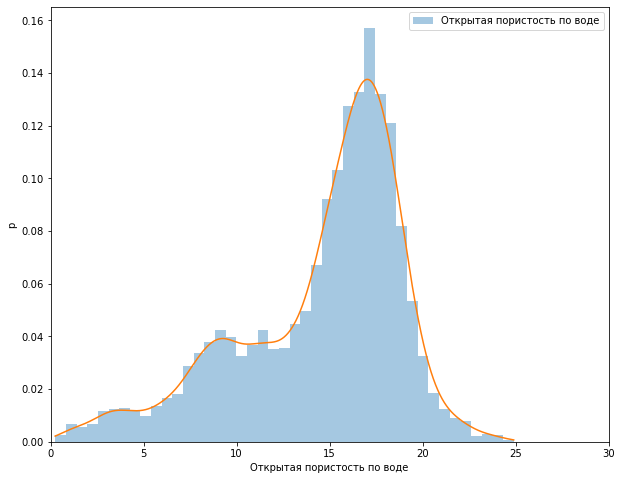

In [76]:
plt.figure(figsize=(10, 8))

df_wd_kpow = work_data['Открытая пористость по воде, %'].dropna()

kernel = scipy.stats.gaussian_kde(df_wd_kpow)

min_amount = df_wd_kpow.min() 
max_amount = df_wd_kpow.max()
x = np.linspace(min_amount, max_amount, len(df_wd_kpow))
kde_values = kernel(x)

sns.distplot(df_wd_kpow, 
             kde=False, norm_hist=True, label=f'Открытая пористость по воде')
plt.plot(x, kde_values)

plt.ylabel('p')
plt.xlabel('Открытая пористость по воде')
# Display values along the abscissa axis only in the interval [0, 10000]
plt.xlim(0, 30)
plt.legend()
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


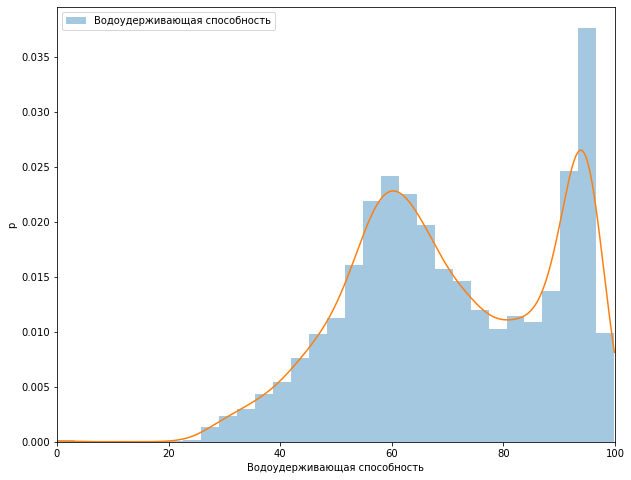

In [77]:
plt.figure(figsize=(10, 8))

df_wd_kwo = work_data['Водоудерживающая способность, %'].dropna()

kernel = scipy.stats.gaussian_kde(df_wd_kwo)

min_amount = df_wd_kwo.min() 
max_amount = df_wd_kwo.max()
x = np.linspace(min_amount, max_amount, len(df_wd_kwo))
kde_values = kernel(x)

sns.distplot(df_wd_kwo, 
             kde=False, norm_hist=True, label=f'Водоудерживающая способность')
plt.plot(x, kde_values)

plt.ylabel('p')
plt.xlabel('Водоудерживающая способность')
# Display values along the abscissa axis only in the interval [0, 10000]
plt.xlim(0, 100)
plt.legend()
plt.show()

#Оценка порядковой статистики и её представление в виде "ящика с усами"

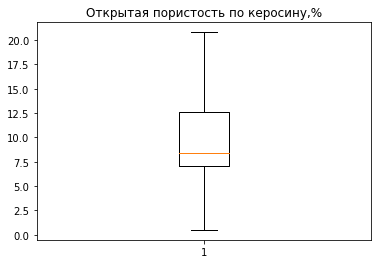

In [78]:
fig1, ax1 = plt.subplots()
ax1.set_title('Открытая пористость по керосину,%')
ax1.boxplot(work_data['Открытая пористость по керосину,%'].dropna(), showfliers=False)

plt.show()

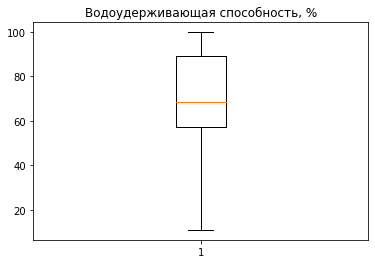

In [79]:
fig2, ax2 = plt.subplots()
ax2.set_title('Водоудерживающая способность, %')
ax2.boxplot(work_data['Водоудерживающая способность, %'].dropna(), showfliers=False)
plt.show()

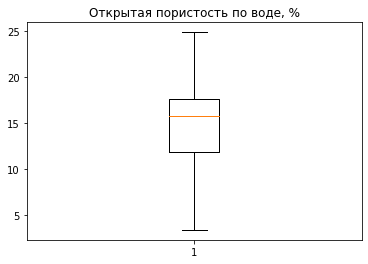

In [80]:
fig3, ax3 = plt.subplots()
ax3.set_title('Открытая пористость по воде, %')
ax3.boxplot(work_data['Открытая пористость по воде, %'].dropna(), showfliers=False)
plt.show()

                               label  25%_quartile     median  75%_quartile
0  Открытая пористость по керосину,%      7.100000   8.374352     12.600000
1    Водоудерживающая способность, %     57.204329  68.700000     89.002164
2     Открытая пористость по воде, %     11.908244  15.824909     17.614656


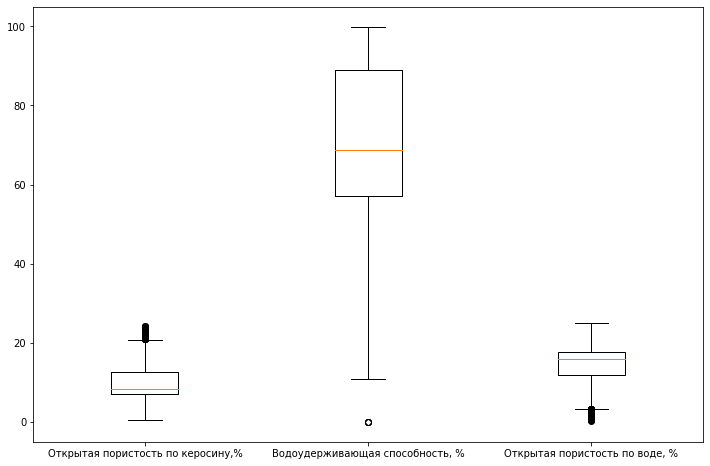

In [81]:
def get_box_plot_data(labels, bp):
    rows_list = []

    for i in range(len(labels)):
        dict1 = {}
        dict1['label'] = labels[i]
        #dict1['lower_whisker'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['25%_quartile'] = bp['boxes'][i].get_ydata()[1]
        dict1['median'] = bp['medians'][i].get_ydata()[1]
        dict1['75%_quartile'] = bp['boxes'][i].get_ydata()[2]
        #dict1['upper_whisker'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict1)

    return pd.DataFrame(rows_list)

a='Открытая пористость по керосину,%'
b='Водоудерживающая способность, %'
c='Открытая пористость по воде, %'

data1 = work_data[a].dropna()
data2 = work_data[b].dropna()
data3 = work_data[c].dropna()

plt.figure(figsize=(12, 8))

labels = [a,b,c]
bp = plt.boxplot([data1, data2, data3], labels=labels)
print(get_box_plot_data(labels, bp))
plt.show()

#### <h3>Для пористости по керосину предлагается распреление пирсона, для пористости по воде - логистическое, для водоудерживающей способности - бимодальное, это говорит о неоднородности выборки. <h3>

In [82]:
df_wd_kpo = work_data['Открытая пористость по керосину,%'].dropna()
df_wd_kpow = work_data['Открытая пористость по воде, %'].dropna()
df_wd_ws = work_data['Водоудерживающая способность, %'].dropna()

In [83]:
ML_lg = scipy.stats.lognorm.fit(df_wd_kpo)
ML_lg

(0.34355936017297384, -2.360952205779398, 11.668133835272602)

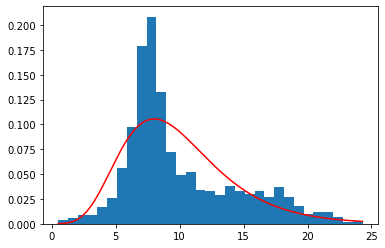

In [84]:
x = np.linspace(df_wd_kpo.min(), df_wd_kpo.max(), len(df_wd_kpo))
plt.hist(df_wd_kpo, bins='auto', density=True )

plt.plot(x, scipy.stats.lognorm.pdf(x,*ML_lg), color='red')

In [85]:
ML_gl = scipy.stats.genlogistic.fit(df_wd_kpow)
ML_gl

(0.2114928786929056, 18.612796633012167, 0.9210130439294185)

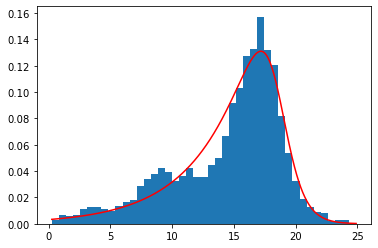

In [86]:
x = np.linspace(df_wd_kpow.min(), df_wd_kpow.max(), len(df_wd_kpow))
plt.hist(df_wd_kpow, bins='auto', density=True )
plt.plot(x, scipy.stats.genlogistic.pdf(x,*ML_gl), color='red')

In [87]:
ML_dw = scipy.stats.dweibull.fit(df_wd_ws)
ML_dw

(1.6524845403394588, 72.3995648818528, 17.413544315266606)

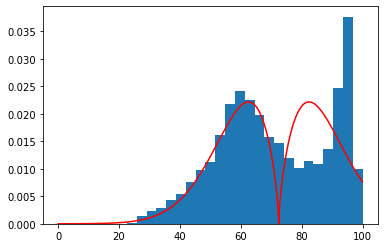

In [88]:
x = np.linspace(df_wd_ws.min(), df_wd_ws.max(), len(df_wd_ws))
plt.hist(df_wd_ws, bins='auto', density=True)

plt.plot(x, scipy.stats.dweibull.pdf(x,*ML_dw), color='red')

In [89]:
def _LSM_lg(params):
    percs = np.linspace(1, 99, 4)
    qn_first = np.percentile(df_wd_kpo, percs)
    qn_norm = scipy.stats.lognorm.ppf(percs/100, *params)
    
    return qn_first-qn_norm

(0.34355936017297384, -2.360952205779398, 11.668133835272602)
[ 0.31023544 -3.37320344 12.22413189]


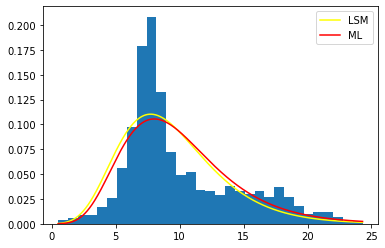

In [90]:
from scipy.optimize import least_squares
x0 = np.random.rand(len(ML_lg))

r = least_squares(_LSM_lg, x0)

LSM_lg = r.x
print(ML_lg)
print(LSM_lg)

x = np.linspace(df_wd_kpo.min(), df_wd_kpo.max(), len(df_wd_kpo))
plt.hist(df_wd_kpo, bins='auto', density=True )
plt.plot(x, scipy.stats.lognorm.pdf(x,*LSM_lg), color='yellow', label = 'LSM')
plt.plot(x, scipy.stats.lognorm.pdf(x,*ML_lg), color='red', label = 'ML')
plt.legend()

plt.savefig('Lognorm.png', dpi = 1000)

In [91]:
def _LSM_gl(params):
    percs = np.linspace(1, 99, 10)
    #print(percs)
    qn_first = np.percentile(df_wd_kpow, percs)
    #print(qn_first)
    qn_norm = scipy.stats.genlogistic.ppf(percs/100, *params)
    
    return qn_first-qn_norm

[ 0.38835557 17.42094163  1.34069578]
(0.2114928786929056, 18.612796633012167, 0.9210130439294185)


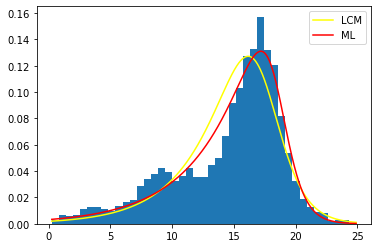

In [92]:
from scipy.optimize import least_squares
x0 = np.random.rand(len(ML_gl))

r = least_squares(_LSM_gl, x0)

LSM_gl = r.x
print(LSM_gl)
print(ML_gl)

x = np.linspace(df_wd_kpow.min(), df_wd_kpow.max(), len(df_wd_kpow))
plt.hist(df_wd_kpow, bins='auto', density=True )
plt.plot(x, scipy.stats.genlogistic.pdf(x,*LSM_gl), color='yellow', label = 'LCM')
plt.plot(x, scipy.stats.genlogistic.pdf(x,*ML_gl), color='red', label = 'ML')
plt.legend()

plt.savefig('Genlogistic.png', dpi = 1000)

In [93]:
def _LSM_dw(params):
    percs = np.linspace(1, 99, 4)
    qn_first = np.percentile(df_wd_ws, percs)
    qn_norm = scipy.stats.dweibull.ppf(percs/100, *params)
    
    return qn_first-qn_norm

(1.6524845403394588, 72.3995648818528, 17.413544315266606)
[ 1.96059555 67.82282225 16.61143469]


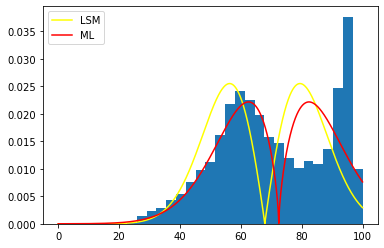

In [94]:
from scipy.optimize import least_squares
x0 = np.random.rand(len(ML_dw))

r = least_squares(_LSM_dw, x0)

LSM_dw = r.x
print(ML_dw)
print(LSM_dw)

x = np.linspace(df_wd_ws.min(), df_wd_ws.max(), len(df_wd_ws))
plt.hist(df_wd_ws, bins='auto', density=True )
plt.plot(x, scipy.stats.dweibull.pdf(x,*LSM_dw), color='yellow', label = 'LSM')
plt.plot(x, scipy.stats.dweibull.pdf(x,*ML_dw), color='red', label = 'ML')
plt.legend()

plt.savefig('dweibull.png', dpi = 1000)

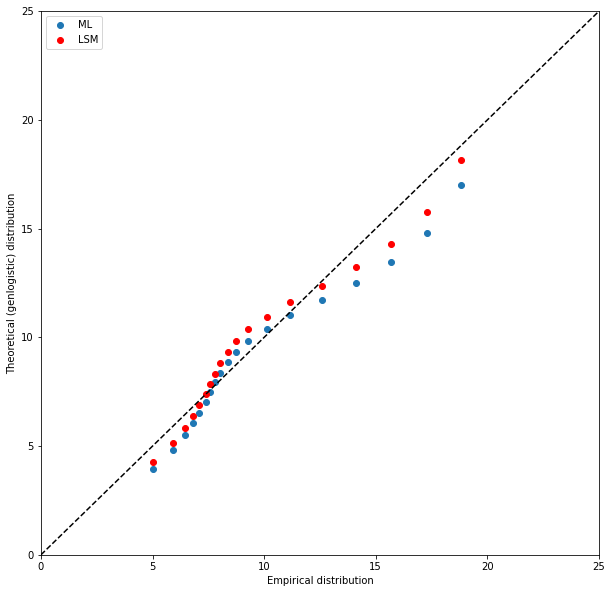

<Figure size 432x288 with 0 Axes>

In [95]:
percs = np.linspace(0, 100, 21)
qn_first = np.percentile(df_wd_kpo, percs)
qn_lg_lsm = scipy.stats.lognorm.ppf(percs / 100.0, *LSM_lg)
qn_lg_ml = scipy.stats.lognorm.ppf(percs / 100.0, *ML_lg)

plt.figure(figsize=(10, 10))
plt.plot(qn_first, qn_lg_lsm, ls="", marker="o", markersize=6, label = 'ML')
plt.plot(qn_first, qn_lg_ml, ls="", marker="o", markersize=6, color = 'red', label = 'LSM')
plt.plot(x, x, color="k", ls="--")
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.xlabel(f'Empirical distribution')
plt.ylabel('Theoretical (genlogistic) distribution')
plt.legend()

plt.show()
plt.savefig('QQ1_lognorm.jpg', dpi = 1000)

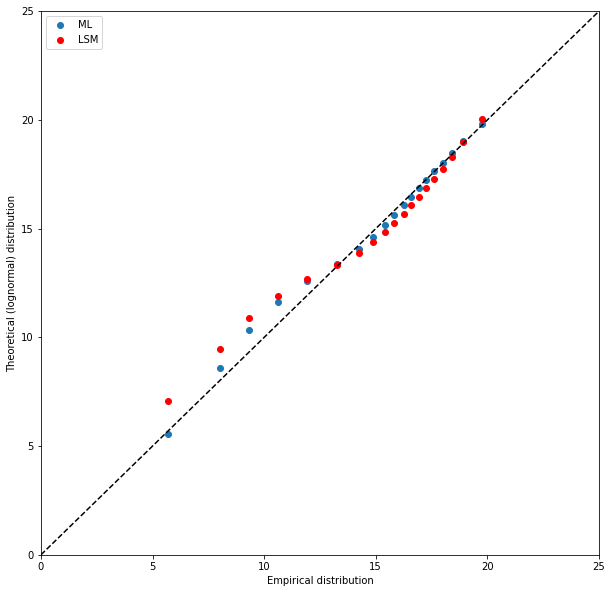

<Figure size 432x288 with 0 Axes>

In [96]:
percs = np.linspace(0, 100, 21)
qn_first = np.percentile(df_wd_kpow, percs)
qn_gl_ml = scipy.stats.genlogistic.ppf(percs / 100.0, *ML_gl)
qn_gl_lsm = scipy.stats.genlogistic.ppf(percs / 100.0, *LSM_gl)

plt.figure(figsize=(10, 10))
plt.plot(qn_first, qn_gl_ml, ls="", marker="o", markersize=6, label = 'ML')
plt.plot(qn_first, qn_gl_lsm, ls="", marker="o", markersize=6, color = 'red', label = 'LSM')
plt.plot(x, x, color="k", ls="--")
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.xlabel(f'Empirical distribution')
plt.ylabel('Theoretical (lognormal) distribution')
plt.legend()

plt.show()
plt.savefig('QQ2_genlog.jpg', dpi = 1000)

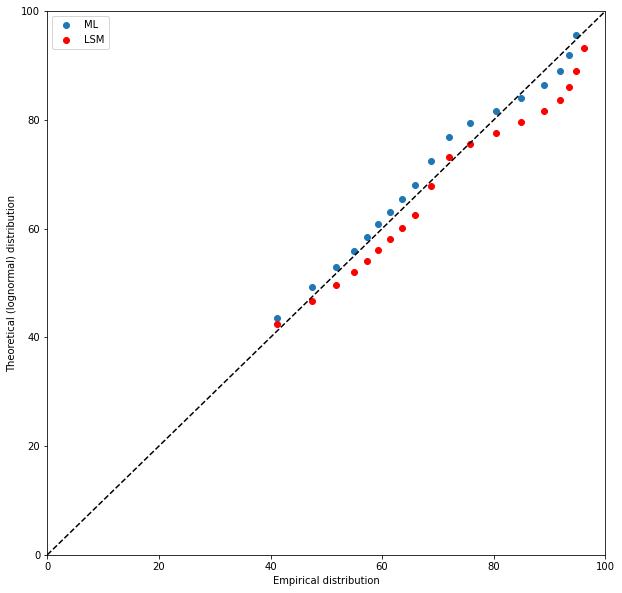

<Figure size 432x288 with 0 Axes>

In [97]:
x = np.linspace(df_wd_ws.min(), df_wd_ws.max(), len(df_wd_ws))
percs = np.linspace(0, 100, 21)
qn_first = np.percentile(df_wd_ws, percs)
qn_dw_ml = scipy.stats.dweibull.ppf(percs / 100.0, *ML_dw)
qn_dw_lsm = scipy.stats.dweibull.ppf(percs / 100.0, *LSM_dw)

plt.figure(figsize=(10, 10))
plt.plot(qn_first, qn_dw_ml, ls="", marker="o", markersize=6, label = 'ML')
plt.plot(qn_first, qn_dw_lsm, ls="", marker="o", markersize=6, color = 'red', label = 'LSM')
plt.plot(x, x, color="k", ls="--")
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xlabel(f'Empirical distribution')
plt.ylabel('Theoretical (lognormal) distribution')
plt.legend()

plt.show()
plt.savefig('QQ3_dweibull.jpg', dpi = 1000)

In [98]:
ks_gl = scipy.stats.kstest(df_wd_kpow, 'genlogistic', LSM_gl, N=100)
shapiro_gl = scipy.stats.shapiro(df_wd_kpow)
print(ks_gl)
print(shapiro_gl)

KstestResult(statistic=0.0738935268111317, pvalue=8.586236164285542e-38)
ShapiroResult(statistic=0.9259344935417175, pvalue=0.0)


/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [99]:
ks_lg = scipy.stats.kstest(df_wd_kpo, 'lognorm', LSM_lg, N=100)
shapiro_lg = scipy.stats.shapiro(df_wd_kpo)
print(ks_lg)
print(shapiro_lg)

KstestResult(statistic=0.09423976573000517, pvalue=1.4511665876995257e-22)
ShapiroResult(statistic=0.9049186706542969, pvalue=5.312840958687182e-39)


In [100]:
ks_dw = scipy.stats.kstest(df_wd_ws, 'dweibull', LSM_dw, N=100)
shapiro_ws = scipy.stats.shapiro(df_wd_ws)
print(ks_dw)
print(shapiro_ws)

KstestResult(statistic=0.15178719546479325, pvalue=9.97128701056271e-151)
ShapiroResult(statistic=0.9522582292556763, pvalue=6.025583396596713e-44)
